# 차원축소 (dimensionality reduction)


- 알고리즘
  - PCA
  - LDA
  - SVD
  - NMF

- 정의
  - 많은 피처(feature, 컬럼, 독립변수)로 구성된 다차원 데이터(피처가 많다=>차원이 높다)의 차원을 축소하여(피처를 줄여서) 새로운 차원의 데이터세트로(새로운 피처를가진) 생성하는 것이다
- 목적
  - 일반적으로, 차원이 증가되면, 데이터 포인트간의 거리가 기하급수적으로 멀어진다 -> 회소한 구조를 가지게 된다
  - 피처가 수백게 이상으로 만들어진 데이터세트 자체는 저차원 데이터에 비해서 예측 신뢰성이 떨어진다
    - 피처가 많으면 개별 피처간 상관관계가 높을 가능성이 크다 -> 다중 공선성 문제를 야기 -> 예측 성능이 저하된다
  - 예측 성능을 높이기 위해서, 데이터를 저차원으로 압축한다 -> 학습시 학습량줄어드는 효과도 발생

- 역활
  - 분류나 회귀, 군집등의 일련의 작업의 효율을 높이기 위해서 단지 지원해주는 보조도구
  - 데이터 전처리에 속한다!! 

- 방법
  - 피처 선택 : feature selection
    - 피처들중에 특정 피처에 종속성이 큰(영향력/대표성이 큰 피처에 따라 변동되는 피처) 피처는 제거
    - 남는 피처는 데이터의 특성을 가장잘 표현하는 것만 남긴다
    - 데이터에 대한 통찰, 상관성으로 체크
  - 피처 추출 : feature extraction
    - 기존 피처를 저차원의 중요 피처로 압축하여 추출한다 (2->1, 4->1)
    - 기존 피처와 완전히 다른 데이터이다
    - 압축은(알집과 같은 단순압축이 아니다) -> 피처를 잘 설명할수 있게 다른 공간으로 투영한것이다
      - 일반적으로 인지할수 없는 잠재적인 요소를 추출하는것
      - PCA, SVD, NMF,..
        - SVD, NMF 는 문서내에서 단어들, 제목등등 에서 문서 자체 구성에 담겨있는 시멘틱 의미, 토픽등을 잠재요소로 보고 추출할수 있는 알고리즘

# PCA

- Principal Component Analysis
- 여러 변수간에 존재하는 상관관계를 이용하여 이것들을 대표하는 주성분을 추출하여 차원을 축소하는 기법
- 주성분 분석/추출

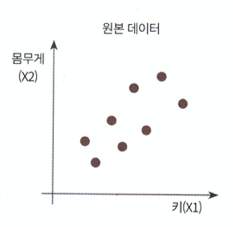

In [ ]:
from IPython.display import Image
Image('pca_1.png', width=200)
# 키와 몸무게에 대한 데이터를 시각화
# 키와 몸무게등 2개의 피처를 가진 데이터 세트

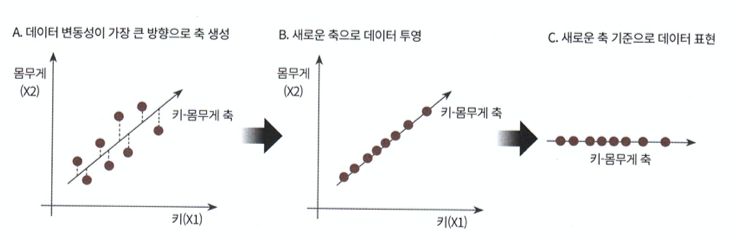

In [ ]:
Image('pca_2.png', width=500)
# 1. 데이터의 변동성 가장 큰 방향으로 (선형회귀기반으로 1차함수로 표현(그림)) 축을 생성
# 2. 해당 축을 중심으로 직교가 되는 축을 생성(직교 행렬)
# 3. 두번째축을 기반으로 다시 직각이 되는 축을 생성해서 여기에 데이터를 투영한다 B와 같은 그림
# 4. 이렇데 투영된 데이터를 추출하면 C와 같은 그림이 된다

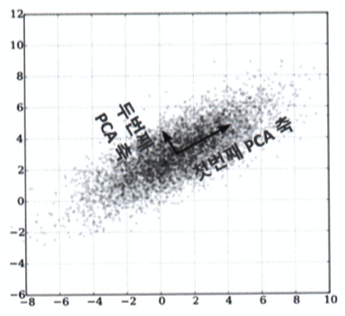

In [ ]:
Image('pca_3.png', width=200)
# 많은 데이터가 투영된1번축, 2번 직교방 형태에서 향축을 표현한 그림



```
내부 처리 절차
- 입력 데이터 세트의 공분산 행렬를 생성 (변동성이 큰 첫번째 백터축을 생성한다)
- 공분산 행렬의 고유백터와 고유값을 계산(첫번째 축에 직각이 되는 직교백터를 계산)
- 고유값이 큰 순서대로 K개(PCA 변환 차수(맻개로 줄일것인가)만큼 고유백터를 생성(축을 k개만큼 만듬)
- 해당 고유백터를 이용하여, 입력데이터를 변환처리한다(k개의 축에 데이터를 투영한다)

```



In [ ]:
# 아이리스 데이터를 활용하여 4개의 피처를 2개로 압축 추출하여 그 효용성을 체크해 보겟다
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 데이터셋 로드
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
cols = ['sepal_length','sepal_width','petal_length','petal_width']

In [ ]:
iris_df           = pd.DataFrame( iris.data, columns=cols )
iris_df['target'] = iris.target
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [ ]:
iris_df.shape

(150, 5)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

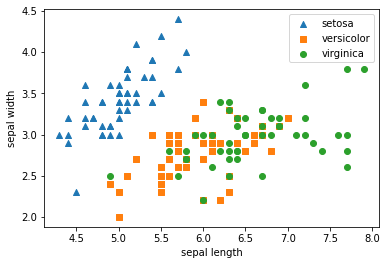

In [ ]:
# 데이터 분포를 시각화를 통해 보고 PCA를 적용해야하는 당위성 확인
# 'setosa':삼각형, 'versicolor':네모, 'virginica':동그라미
markers = ['^','s','o']

# 각 종별로 sepal_length	sepal_width 속성 표현(꽃받침 길이 너비)
for i, marker in enumerate(markers):
  # 속성별(sepal_length	sepal_width)로, 정답별(3)로 데이터 추출
  # ex) setosa 데이터중에(50개) 컬럼이 sepal_length인 데이터만 추출 -> Series
  x_axis_data = iris_df[ iris_df['target'] == i ]['sepal_length'] 
  y_axis_data = iris_df[ iris_df['target'] == i ]['sepal_width']
  # 분포도, 산포도
  plt.scatter( x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i] )
  # 총 3회를 그린다 => 종별로 각각 다른색으로 포인트가 찍힌다

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

- 분석
  -  'setosa':삼각형, 'versicolor':네모, 'virginica':동그라미
  - setosa는 sepal width값이 3이상이고, sepal length 가 6.0이하인 곳에 일정하게 분포되어 있다 -> 다른 종에 확연하게 구분된다
  - virginica, versicolor 이 2개의 종은 데이터가 많이 겹쳐서, 분류하기가 어렵다
    - 비지도학습의 차원축소 기법을 이용하여 (PCA)를 이용하여 피처를 2개로 압축 -> 품종 분포 데이터를 2차원으로 (원래는 4차원) 줄여서 구분이 잘되는지 확인!!|

- 스케일러 전체 종류 확인
- pca를 적용하여서 2개의 특성을 뽑아서 다시 시각화 하여, 종별 구분이 잘된다는 점을 추출하면 성공적인 적용 사례가 될것이다

## 머신러닝을 이용하여서 분류 진행

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# cross_val_score => 교차검증 
from sklearn.model_selection import cross_val_score

In [ ]:
# 알고리즘 생성
rcf = RandomForestClassifier( random_state=123 )
# 원본데이터로 학습, 예측 수행
score = cross_val_score( rcf, iris.data, iris.target, scoring='accuracy', cv=3 )
print( score )

[0.98 0.94 0.96]


In [ ]:
iris_pca_df.head(2)

,pca_com_1,pca_com_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0


In [ ]:
# PCA로 압축한 데이터를 이용하여 교차 검증 수행
score = cross_val_score( rcf, iris_pca_df[ iris_pca_df.columns[:2] ], iris.target, scoring='accuracy', cv=3 )
print( score )
# PCA로 압축한 데이터를 이용한 평가값이 평균적으로 더 높다->성능향상(분류 성능이 향상)

[0.98 0.98 1.  ]


# LDA

- Latent Dirichlet Allocatoin
- 잠재 디리클레 할당 : 문서상에서 잠재되어 있는 토픽을 이용하여 분류하는 방법론
- 입력 데이터의 결정값 **클레스를 최대한 분리할수 있는 축**을 찾는 방식으로 차원 축소가 진행된다
  - LDA vs **PCA:변수들간의 변동성이 가장 큰 축**을 찾는다
  - LDA는 변동량이 아닌, 분류가 가장 잘되는 축을 찾는것으로부터 시작

In [ ]:
# 데이터 로드
iris        = load_iris()
# 정규화 => 여기서는 특성만 들어가 있다
iris_scaled = StandardScaler().fit_transform( iris.data )

In [ ]:
# 알고리즘 준비
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
# 알고리즘 생성
# n_components : 차원의 수
lda = LinearDiscriminantAnalysis( n_components=2 )

In [ ]:
# 훈련
lda.fit( iris_scaled, iris.target )

LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
# 변환 -> 4D->2D
iris_lda = lda.transform( iris_scaled )

In [ ]:
iris_lda.shape, type(iris_lda)

((150, 2), numpy.ndarray)

In [ ]:
# df 구성
iris_lda_df = pd.DataFrame( iris_lda, columns=['lda_com_1','lda_com_2'] )
iris_lda_df['target'] = iris.target
iris_lda_df.head(2)

,lda_com_1,lda_com_2,target
0,8.061800,0.300421,0
1,7.128688,-0.786660,0


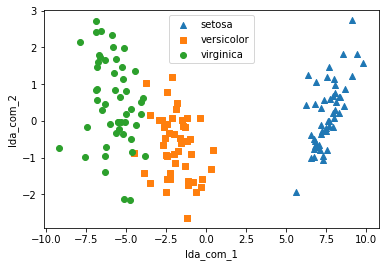

In [ ]:
markers = ['^','s','o']

for i, marker in enumerate(markers):
  x_axis_data = iris_lda_df[ iris_lda_df['target'] == i ]['lda_com_1'] 
  y_axis_data = iris_lda_df[ iris_lda_df['target'] == i ]['lda_com_2']
  plt.scatter( x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i] )

plt.legend()
plt.xlabel('lda_com_1')
plt.ylabel('lda_com_2')
plt.show()

# 3가지 종이 잘 구분이 된다
# PCA와 비교를 해보면 분포도의 포지션이 좌우가 변경되었다
# setosa를 제외한 2개 종은 구분은 잘되나, 가깝게 밀집되 있다는 것은 PCA와 동일함

In [ ]:
score = cross_val_score( rcf, iris_lda_df[ iris_lda_df.columns[:2] ], iris.target, scoring='accuracy', cv=3 )
print( score )
# PCA보다는 다소 스코어가 떨어진다,
# 첫번째 검증에서는 최고 스코어가 나왔다

[1.   0.9  0.96]


# SVD

- Singular value Decomposition
- PCA 와 유사한 결과가 나오고, 실제적으로는 PCA가 SVD를 사용한다
  - 단, PCA는 정방행렬(행과 열이 동일한 형태)를 기본으로 고유 백터를 만들어서 분해
  - SVD는 정방행렬, 행과 열이 상이한 행렬도 적용 가능
- 고차원의 피처 데이터를 가진 행렬을 2개와 같은 저차원 행렬로 분리하는 행렬 분해 기법이다
- API
  - numpy, scipy에서 지원 : 분해된 요소를 볼수 있다
  - scikit-learn에서 지원 : 그냥 사용(분해 요소(행렬)은 은닉되어 있다

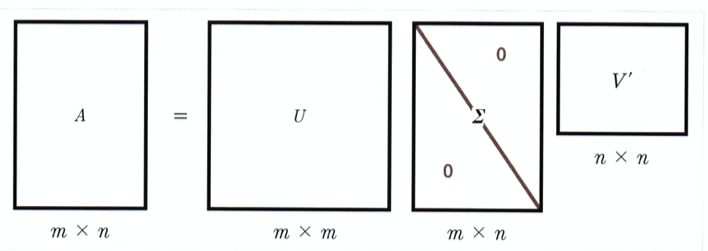

In [ ]:
Image('svd_0.png', width=400)
# SVD는 m x n 행렬 A를 3개의 구성요소로 분해
# U 행렬, 시그마 행렬, V` 전치 행렬
# 전치행렬 : 행과 열을 교환하여서 얻어지는 행렬이다. 대각선을 기준으로 반사대칭을 가하여 얻는행렬

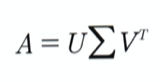

In [ ]:
Image('svd.png', width=100)
# 아래의 식으로 표현 -> 복원이 가능하다 -> 계산에는 내적이 사용됨

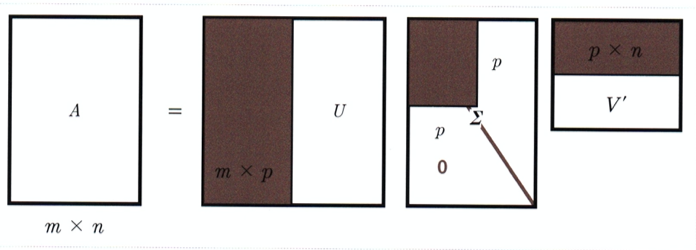

In [ ]:
Image('svd_1.png', width=400)
# 아래 그림에서 색이 칠해진 부분은 절단(Truncated)해서 압축한다
# => 100% 복원은 않되고, 근사치로 복원된다 -> 연상량, 속도, 결과를 위해서 처리하는 방식

In [ ]:
# 3개로 쪼개는 행렬 확인
import numpy as np
from numpy.linalg import svd

In [ ]:
# 데이터 준비 -> 더미 데이터로 랜덤하게 생성
# 4x4
np.random.seed( 121 )

In [ ]:
a = np.random.randn(4,4)
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])

In [ ]:
# 더미 데이터
np.round(a, 3)

array([[-0.212, -0.285, -0.574, -0.44 ],
       [-0.33 ,  1.184,  1.615,  0.367],
       [-0.014,  0.63 ,  1.71 , -1.327],
       [ 0.402, -0.191,  1.404, -1.969]])

In [ ]:
# 분해
U, Sigma, Vt = svd( a )
U.shape, Sigma.shape, Vt.shape 

((4, 4), (4,), (4, 4))

In [ ]:
print( U )
print( Sigma )
print( Vt )

[[-0.07913928 -0.31822729  0.86653217  0.37628494]
 [ 0.38294523  0.78655287  0.12002097  0.46934262]
 [ 0.65640669  0.02243181  0.35668848 -0.66437971]
 [ 0.64515128 -0.52873697 -0.32785711  0.44353889]]
[3.4229581  2.02287339 0.46263157 0.07935069]
[[ 0.04100747  0.22367823  0.78643002 -0.57429458]
 [-0.20019867  0.56209596  0.37041464  0.71187191]
 [-0.77847455  0.3945136  -0.33259252 -0.3573774 ]
 [-0.5934781  -0.69164673  0.36565426  0.18895901]]


In [ ]:
# 복원 -> 내적 계산
'''
(2,2)dot(2,2)
1,2     5,6
3,4     7,8  
-----------
(2,2)
1*5 + 2*7 = 5+14 = 19, 
'''
# 행렬의 곱
'''
(2,2)*(2,2)
1,2     5,6
3,4     7,8  
-----------
(2,2)
1*5= 5,
'''

In [ ]:
x = np.array( [ [1,2],[3,4] ] )
x

array([[1, 2],
       [3, 4]])

In [ ]:
y = np.array( [ [5,6],[7,8] ] )
y

array([[5, 6],
       [7, 8]])

In [ ]:
# 행렬의 내적곱
np.dot(x, y)

array([[19, 22],
       [43, 50]])

In [ ]:
# 행렬곱
x*y

array([[ 5, 12],
       [21, 32]])

In [ ]:
#  시그마를 맴버가 0으로 대각선이 시그마 값으로 세팅되는 대칭행렬로 변환
Sigma_2d = np.diag( Sigma )
Sigma_2d

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

In [ ]:
# 내적곱 : dot product
a_ = np.dot( np.dot(U, Sigma_2d), Vt )
print( a_)

[[-0.21203317 -0.28492917 -0.57389821 -0.44031017]
 [-0.33011056  1.18369457  1.61537293  0.36706247]
 [-0.01411931  0.6296418   1.70964074 -1.32698736]
 [ 0.40187312 -0.19142667  1.40382596 -1.96876855]]


In [ ]:
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.01411931,  0.6296418 ,  1.70964074, -1.32698736],
       [ 0.40187312, -0.19142667,  1.40382596, -1.96876855]])



---



In [ ]:
# 만약 데이터에 의존성을 부여한다면 -> 식으로 표현된다면 -> 시그마 행렬 확인 (변화된점)
a[2] = a[0] + a[1]
a[3] = a[0]
a

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

In [ ]:
U, Sigma, Vt = svd(a)
np.round(Sigma, 3)
# 2개의 값이 0으로 변했다 -> 데이터 2개가 선형으로 설명할수 있는 백터가 되었다
# 2개는 설명할수 있다 선형으로

array([2.663, 0.807, 0.   , 0.   ])

In [ ]:
# 복원 -> 의존성이 보이는, 선형을 설명할수 있는 부분을 제외하고 복원
U[:, :2 ]

array([[ 0.24568427,  0.58278576],
       [-0.77441642, -0.01670951],
       [-0.52873215,  0.56607625],
       [ 0.24568427,  0.58278576]])

In [ ]:
np.diag(Sigma[:2])

array([[2.66335286, 0.        ],
       [0.        , 0.80703506]])

In [ ]:
Vt[:2]

array([[ 0.16449395, -0.57517122, -0.78233269, -0.17342252],
       [-0.67967123,  0.19439734, -0.13178782, -0.69490191]])

In [ ]:
# 데이터의 의존성(선형이) 설명되면 해당 요소를 빼서 복원이 가능 -> svd 내부에서 행렬분해/복원 원리
np.dot( np.dot( U[:, :2 ], np.diag(Sigma[:2]) ), Vt[:2])

array([[-0.21203317, -0.28492917, -0.57389821, -0.44031017],
       [-0.33011056,  1.18369457,  1.61537293,  0.36706247],
       [-0.54214372,  0.8987654 ,  1.04147472, -0.0732477 ],
       [-0.21203317, -0.28492917, -0.57389821, -0.44031017]])

## SVD

## Truncated SVD

In [ ]:
# 머신러닝에 svd 차원축소법을 이용하여 예측하기
# TruncatedSVD, PCA  비교
from sklearn.decomposition import TruncatedSVD, PCA

iris     = load_iris()

# 실제 특성 4개
iris.data.shape

(150, 4)

In [ ]:
# 차원축소 -> TruncatedSVD을 사용하는데 2차원으로 압축 축소
tsvd = TruncatedSVD( n_components=2 )

In [ ]:
# 학습
tsvd.fit( iris.data )

TruncatedSVD(algorithm='randomized', n_components=2, n_iter=5,
             random_state=None, tol=0.0)

In [ ]:
# 데이터 변환 -> 행렬 분해 => 이 재료를 가지고 압축을 해서 2차원으로 뽑는다
iris_tsvd = tsvd.transform( iris.data )
iris_tsvd.shape

(150, 2)

Text(0, 0.5, 'TruncatedSVD com_2')

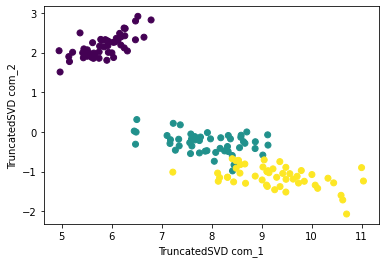

In [ ]:
# 시각화
plt.scatter( x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target )
plt.xlabel('TruncatedSVD com_1')
plt.ylabel('TruncatedSVD com_2')
# 분류가 비교적 잘 되었다

In [ ]:
# 스케일러 적용, PCA도 적용해서 각각 그려서 비교 -> PCA 내부에서 SVD를 사용한다
# SVD가 더 큰 범주이다!!
# 1. 스케일러 적용
iris_scaled = StandardScaler().fit_transform( iris.data )
iris_scaled.shape

(150, 4)

In [ ]:
# 2. TSVD기반으로 압축 축소
tsvd = TruncatedSVD( n_components=2 )
tsvd.fit( iris_scaled )
# 실제 압축 처리
iris_tsvd = tsvd.transform( iris_scaled )

In [ ]:
# 3. PCA기반으로 압축 축소
pca  = PCA(n_components=2)
pca.fit( iris_scaled )
iris_pca = pca.transform( iris_scaled )

In [ ]:
# 저차원으로 축소된 데이터의 shape
iris_tsvd.shape, iris_pca.shape

((150, 2), (150, 2))

Text(0.5, 1.0, 'PCA')

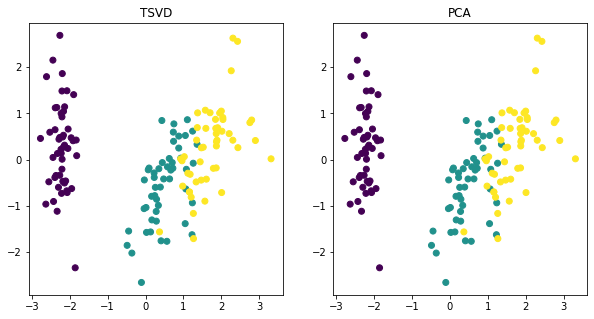

In [ ]:
# 4. 시각화 비교 => 2차원으로 축소했더니, iris의 종들이 잘 분류가 되었는가? 
# 2개의 압축 방법이 어느 정도 결과는 내는지 비교 확인 
# -> 거의 유사하다. PCA에 내적으로는 SVD를 차용하고 있다
fig, (ax1, ax2) = plt.subplots( figsize=(10,5), ncols=2 )
ax1.scatter( x=iris_tsvd[:, 0], y=iris_tsvd[:, 1], c=iris.target ) # tsvd로 압축한 산포도
ax2.scatter( x=iris_pca[:, 0],  y=iris_pca[:, 1],  c=iris.target ) # pca로 압축한  산포도
ax1.set_title('TSVD')
ax2.set_title('PCA')
# SVD, PCA같은 방식은 컴퓨터 비전에서 이미지 압축을 통한 패턴인식, 신호처리에 많이 사용한다

# NMF

- Non-Negative Matrix Factorization
- 전제 원본 행렬 내의 모든 원소값이 양수(0 이상)이라는 것이 보장되면 밑에 그림처림 양수 행렬로 분해가 가능하다
- 피처가 많은 고차원 행렬을 2차원 행렬로 만드는 행렬 분해 기법을 이용하여서 압축하는 방법
  - SVD와 차이점은 행렬을 분해하는 방법이다, 행렬의 구성요소가 모두 양수이다

- 목적
  - 잠재 요소 도출
  - 이미지 변화, 압축
  - 텍스트 토픽(잠재된 주제) 도출

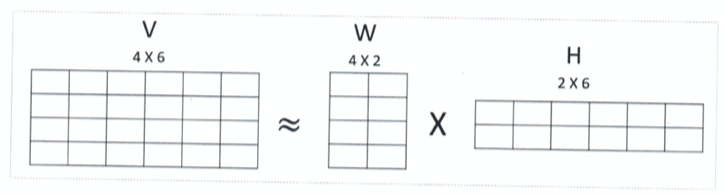

In [ ]:
Image('nmf_1.png', width=400)
# W : 원본 행에 대한 잠재 요소가 얼마나 되는에 대응하는 성분
# H : 잠재 요소가 원본열에는 어떻게 구성되는지는 표현하는 행렬

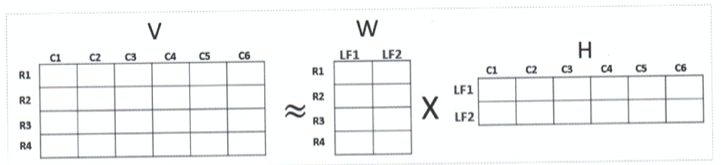

In [ ]:
Image('nmf_2.png', width=400)

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF( n_components=2 )
nmf.fit(iris.data)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=2, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [ ]:
iris_nmf = nmf.transform( iris.data )
iris_nmf.shape

(150, 2)

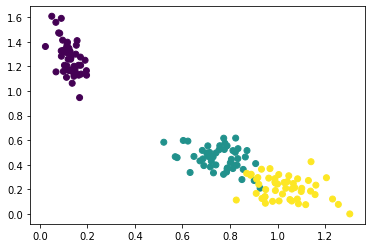

In [ ]:
plt.scatter( x=iris_nmf[:, 0], y=iris_nmf[:, 1], c=iris.target ) 
# 전처리를 적용해 보고 체크해 보야 겟지만, 3개의 종은 분류가 되고 2개 종은 좀더 구분이 필요하다

- 결론
  - 피처가 너무 많으면, 학습에도 많은 시간이 소요가 되고, 다중공선성이라는 문제에 직면할수도 있다
  - 고차원의 피처를 저차원의 피처로 압축하여, 내제되어 있는 잠재적인 피처를 추출하여, 머신러닝을 진행하면 좋은 성과를 낼수 있다
  - PCA, LDA, SVD,Truncated SVD,NMF등 알고리즘을 사용할수 있다
    - sklearn.decomposition
  - 성능을 극대화 하기 위해서 전처리기를 병행하여서 사용한다
    - StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler등등 제품을 사용할수 있고, 각각의 특서이 존재한다
      - sklearn.preprosessing
  - 차원을 줄이는 방법
    - 특성 선택
    - 특성 추출
